# Regression

In this turtial we will learn different techniques to implement Ordinary Least Square (OLS) Regression. We will use longley dataset to explain it. We can broadly classify Linear Regreission as follows:

1. Simple Regression
2. Multiple Regression

In linear regression we can express any dependent variable Y as the linear weighted function of independent variable X. In simple regresion Y is expressed as follows: 

$$ Y = A + B*X $$

It is pertinent to mention that all real life problems are non-linear in nature. However, any non-linear function can be approximated as the combination of multiple linear functions. For instance, a curve can be approximated as the summation of several straight lines.Multiple regression considers dependent variable Y as the linear weighted function of multiple independent variables. It can be expressed as follows:
    

$$ Y = A + B_1 * X_1 + B_2 * X_2 + B_3 * X_3 + .........+ B_n * X_n $$

We need to find an approach to find the co-efficients $B_1,B_2,B_3,.........,B_n$ from a given dataset to fit the regression line. A simple approach is Ordinary Least Square Regression.

### Simple Regression 

#### Method -I: 

#### Step -1 : Load the dataset 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [26]:
#Loading dataset
df = pd.read_csv("longley.csv")


#### Step-2: Display first 10 rows of the dataset 

In [3]:
df.head(10)

,Unnamed: 0,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
5,1952,98.1,346.999,193.2,359.4,113.270,1952,63.639
6,1953,99.0,365.385,187.0,354.7,115.094,1953,64.989
7,1954,100.0,363.112,357.8,335.0,116.219,1954,63.761
8,1955,101.2,397.469,290.4,304.8,117.388,1955,66.019
9,1956,104.6,419.180,282.2,285.7,118.734,1956,67.857


#### Step-3: Display number of rows and columns in the dataset 

In [4]:
print("Longley.csv dataset has :",df.shape[0], " rows and ",df.shape[1], "columns")


Longley.csv dataset has : 16  rows and  8 columns


#### Step-4: Preprocessing 

We will initially consider simple linear regression. We need to select dependent variable 'y' and independent variable 'x'. For sake of simplicity, we are initially discarding data cleaning, data imputation etc. Longley.csv is considered for that reason.

In [5]:
independent_var=["GNP"]
x = df[independent_var]
y = df["Employed"]

#### Step -5: Implement OLS using sklearn 

We need to instantiate LinearRegression(). Python is an Object Oriented Programming (OOP) Language. It is not pure OOP language. We need to import LinearRegression from sklearn.linear_model. We need to use 'dot' operator to access method of any class after creating or instantiating the object of the class. Method is basically a function but it is associated with object. The first argument of method should be "self", the inside object of the class.

In [6]:
lm = LinearRegression()
model = lm.fit(x,y)

#### Step-6: Determine the intercept and co-efficient of 'x' 

In [7]:
print("sklearn_model intercept: ",model.intercept_)
print("sklearn_model coeff: ", model.coef_)

sklearn_model intercept:  51.8435897819
sklearn_model coeff:  [ 0.03475229]


We can say that $Employed = 51.8435 + 0.03475 * GNP $
This is the regression line obtained from OLS.

#### Step-7: Plot the orginal data and regression line 

Determine $ \hat y $. It is the output of OLS model. 

In [8]:
y_hat = model.predict(x)

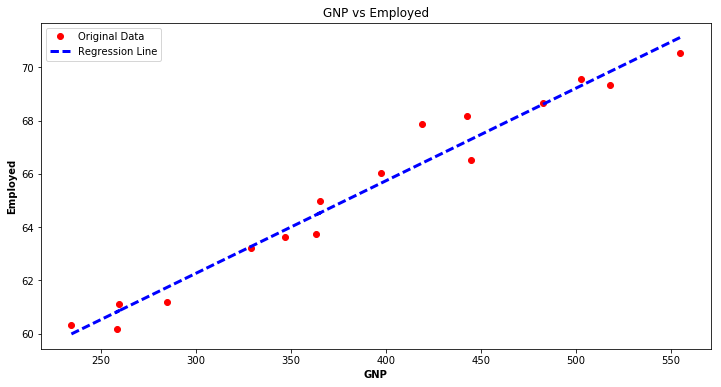

In [9]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df['GNP'],df['Employed'],'o',color="red",label="Original Data")           # scatter plot showing actual data
plt.plot(x,y_hat, '--b', linewidth=3,label="Regression Line") # regression line obtained from OLS
plt.xlabel('GNP',fontweight="bold")
plt.ylabel('Employed',fontweight="bold")
plt.title('GNP vs Employed')
plt.legend()
plt.show()

Above plot shows clearly that regression line is not touching all original data points. We need to verify whether the obtained regression line is best fit or not.

#### Step-8: Statistical Interpretation 

In [10]:
model_var = metrics.explained_variance_score(df['Employed'],y_hat)
model_mean_abs_error = metrics.mean_absolute_error(df['Employed'],y_hat)
model_mse = metrics.mean_squared_error(df['Employed'],y_hat)
model_median_abs_err = metrics.median_absolute_error(df['Employed'],y_hat)
model_r2 = metrics.r2_score(df['Employed'],y_hat)

print(f"Variance : {np.round(model_var,2)}")
print(f"Mean Absolute Error : {np.round(model_mean_abs_error,2)}")
print(f"MSE : {np.round(model_mse,2)}")
print(f"Median Absolute Error : {np.round(model_median_abs_err,2)}")
print(f"R-Square : {np.round(model_r2,4)}")

Variance : 0.97
Mean Absolute Error : 0.51
MSE : 0.38
Median Absolute Error : 0.48
R-Square : 0.9674


The above regression line can predict 96.74% variation of data as R-Square = 0.9674.

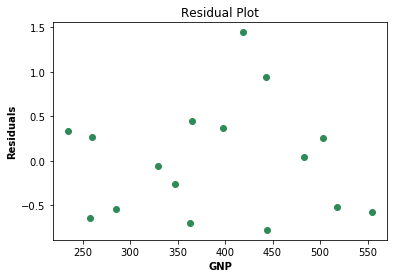

In [11]:
model_residuals = df['Employed'] - y_hat
plt.plot(x,model_residuals,"o",color='seagreen')
plt.title("Residual Plot")
plt.xlabel("GNP",fontweight="bold")
plt.ylabel("Residuals",fontweight="bold")
plt.show()

Residual is basically the error or the difference between actual value and predicted value. If the residual plot is following some particular trend then calculation is wrong. Above residual plot is showing random pattern. No trend is availble. Hence,model is correct. We will learn more about residual analysis in machine learning module.

#### Method -II: 

We can use statsmodel instead of sklearn. Statsmodel gives model summary and it is very useful to understand the goodness of fit. Step 1 to Step 4 will remain same in Method -II.

In [12]:
import statsmodels.api as sm

In [13]:
x = sm.add_constant(x)
x.head(10)

,const,GNP
0,1,234.289
1,1,259.426
2,1,258.054
3,1,284.599
4,1,328.975
5,1,346.999
6,1,365.385
7,1,363.112
8,1,397.469
9,1,419.180


By default add_constant() method adds a new column of one i.e. "const" column to the left of column of independent variable x. It is essential to prepare data for statsmodel. Our input data is ready to be used for statsmodel.Instantiate OLS method. Pass two arguments to instantiate OLS. First argument is dependent variable 'y' and second argument is the independent variable 'x'.

In [14]:
reg_eq = sm.OLS(y,x)


In [15]:
reg_eq

The above output confirm that an object has been created at the hexadecimal address 0xc060240. We can also find the id associated with the object.

In [16]:
id(reg_eq)

170750696

In [17]:
reg_result = reg_eq.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           8.36e-12
Time:                        16:21:26   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000        50.382    53.305
GNP            0.0348      0.002     20.374      0.000         0.031     0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Please refer the lecture notes to understand the above model summary. Hand calculation has been given.

### Multiple Regression 

In multiple regression, we would like to find a linear relationship between the dependent variable 'y' or 'Employed' and the independent variables 'GNP.deflator', 'GNP', 'Unemployed', 'Armed.Forces', and 'Population'. We need to discard columns 'Unnamed: 0' and 'Year' as they are meaningless to predict number of employed persons. Let us display column names of the given dataset. Assume that we are supposed to predict the number of employed persons.

In [18]:
df.columns

Index(['Unnamed: 0', 'GNP.deflator', 'GNP', 'Unemployed', 'Armed.Forces',
       'Population', 'Year', 'Employed'],
      dtype='object')

In preprocessing, one important task is to keep only meaningful features. Create a list for unnecessary features and drop it from the existing pandas dataframe 'df'. Remember we need to update dataframe. Therefore mention 'inplace=True'. It is good to display first few rows of the dataframe to verify whether the unnecessary fields are removed or not.

In [27]:
del_cols = ["Year","Unnamed: 0"]
df.drop(del_cols,inplace=True,axis=1)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
0,83.0,234.289,235.6,159.0,107.608,60.323
1,88.5,259.426,232.5,145.6,108.632,61.122
2,88.2,258.054,368.2,161.6,109.773,60.171
3,89.5,284.599,335.1,165.0,110.929,61.187
4,96.2,328.975,209.9,309.9,112.075,63.221


Separate the dependent variable 'y' or 'Employed' and independent variable 'x'

In [28]:
y=df["Employed"]

In [29]:
independent_var=["GNP.deflator","GNP","Unemployed","Armed.Forces","Population"]
x=df[independent_var]

Add "const" column of one to x

In [30]:
x = sm.add_constant(x)
x.head()

,const,GNP.deflator,GNP,Unemployed,Armed.Forces,Population
0,1,83.0,234.289,235.6,159.0,107.608
1,1,88.5,259.426,232.5,145.6,108.632
2,1,88.2,258.054,368.2,161.6,109.773
3,1,89.5,284.599,335.1,165.0,110.929
4,1,96.2,328.975,209.9,309.9,112.075


Instantiate OLS regression and fit the model. Display model summary.

In [31]:
reg_eq = sm.OLS(y,x)

In [32]:
reg_result = reg_eq.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     156.4
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           3.70e-09
Time:                        16:33:22   Log-Likelihood:                -7.3072
No. Observations:                  16   AIC:                             26.61
Df Residuals:                      10   BIC:                             31.25
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           92.4613     35.169      2.629      0.025        14.099   170.823
GNP.deflator    -0.0485      0.132     -0.366      0.722        -0.343     0.246
GNP              0.0720      0.032      2.269      0.047         0.001     0.143
Unemployed      -0.0040      0.004     -0.921      0.379        -0.014     0.006
Armed.Forces    -0.0056      0.003     -1.975      0.077        -0.012     0.001
Population      -0.4035      0.330     -1.222      0.250        -1.139     0.332
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.642
Skew:                           0.489   Prob(JB):                        0.725
Kurtosis:                       3.079   Cond. No.                     1.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above model shows that obtained R-Square value is equal to 0.987. It means 98.7% variation of data can be expressed by the regression line. In simple regression we got R-Square is equal to 0.9674. In multiple regression we got much higher value. However, we didn't mention about overfitting. We will discuss in detail about overfitting in machine learning module. In multiple regression, we need to develop the base model considering all features of the dataset. Then we need to eliminate features in sequence to get the best model.

Equation of regression line: $$ Employed = 92.4613 - 0.0485*GNP.deflator + 0.0720 * GNP - 0.0040 * Unemployed - 0.0056 * Armed.Forces -0.4035 * Population $$

It means except 'GNP' all remaining variables have negative impact on number of employed as per the given data. 

In machine learning module we will learn how to select features in multiple regression.